<a href="https://colab.research.google.com/github/shuwen1127/lobsterland_winterwonderland-/blob/main/Maketing_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import numpy as np
import pandas as pd
import sklearn as sl
import sklearn.preprocessing as preprocessing
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [39]:
#from google.colab import files
#uploaded = files.upload()

In [40]:
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [41]:
df = pd.read_csv('gdrive/My Drive/dataset for K means clustering/newpass.csv')
df

,hhold_ID,visit_2018,visit_2019,visit_2020,household_pax,avg_ride_count,avg_food_spend,avg_merch_spend,park_home_dist,est_hh_income
0,1,1,3,2,4,19,27,25.148980,145.397020,106667
1,2,2,2,1,3,18,15,18.549980,22.009987,83310
2,3,3,4,4,6,12,28,33.648800,8.242666,145482
3,4,1,3,5,1,22,12,17.734020,19.901816,110248
4,5,6,4,6,4,23,25,21.423620,10.544714,89930
...,...,...,...,...,...,...,...,...,...,...
7195,7196,3,11,8,3,20,13,24.550705,72.720767,137309
7196,7197,7,7,7,2,18,15,16.672560,11.717235,75141
7197,7198,1,2,2,4,22,28,28.750340,5.198354,129773
7198,7199,9,4,4,3,13,13,27.935700,26.845595,138744


# Data clening 

In [42]:
# if missing data

In [43]:
# correlation heatmap

# normolize 
data = df.corr()
data

,hhold_ID,visit_2018,visit_2019,visit_2020,household_pax,avg_ride_count,avg_food_spend,avg_merch_spend,park_home_dist,est_hh_income
hhold_ID,1.000000,0.014882,0.015089,0.011008,-0.000352,0.002421,-0.000001,-0.005025,0.016905,0.021279
visit_2018,0.014882,1.000000,0.324851,0.336451,0.014484,0.019192,0.027222,0.009561,-0.009439,-0.001813
visit_2019,0.015089,0.324851,1.000000,0.265360,-0.014388,-0.002481,-0.007643,0.017001,-0.024283,0.004604
visit_2020,0.011008,0.336451,0.265360,1.000000,-0.015098,0.011669,0.013205,0.011202,0.009898,0.000159
household_pax,-0.000352,0.014484,-0.014388,-0.015098,1.000000,0.280526,0.690098,-0.012393,-0.013696,0.012136
avg_ride_count,0.002421,0.019192,-0.002481,0.011669,0.280526,1.000000,0.325559,-0.018623,-0.005017,-0.009710
avg_food_spend,-0.000001,0.027222,-0.007643,0.013205,0.690098,0.325559,1.000000,-0.012335,-0.000155,0.009714
avg_merch_spend,-0.005025,0.009561,0.017001,0.011202,-0.012393,-0.018623,-0.012335,1.000000,0.013935,0.064925
park_home_dist,0.016905,-0.009439,-0.024283,0.009898,-0.013696,-0.005017,-0.000155,0.013935,1.000000,0.015465
est_hh_income,0.021279,-0.001813,0.004604,0.000159,0.012136,-0.009710,0.009714,0.064925,0.015465,1.000000


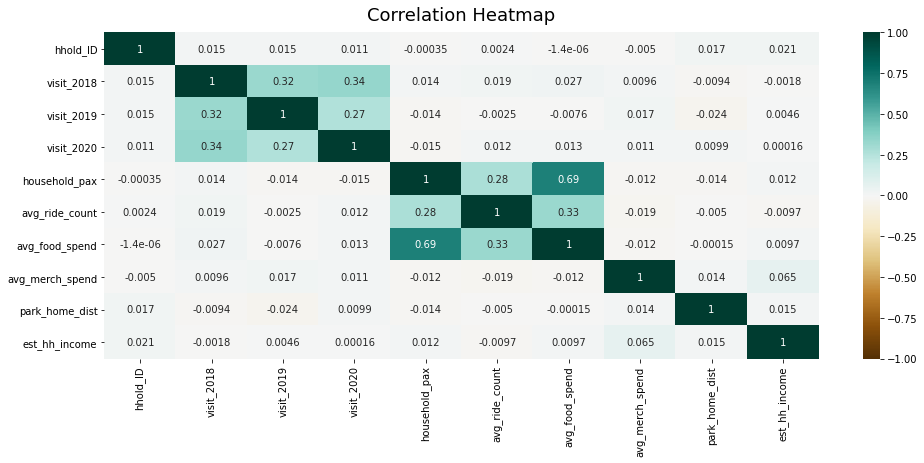

In [44]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(data, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);
# save heatmap as .png file
# dpi - sets the resolution of the saved image in dots/inches
# bbox_inches - when set to 'tight' - does not allow the labels to be cropped
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

Heatmap correlation By generate this map, we can see a strong relation between house_hold_pax and average_food_spend 

In [45]:
df.describe()

,hhold_ID,visit_2018,visit_2019,visit_2020,household_pax,avg_ride_count,avg_food_spend,avg_merch_spend,park_home_dist,est_hh_income
count,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000
mean,3600.500000,2.700000,3.952083,2.983194,2.736806,14.863056,17.533889,27.025812,31.083716,112115.481250
std,2078.605302,3.634694,4.404825,2.824027,1.077897,4.018933,4.892932,59.351138,25.016546,22544.894634
min,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,8.000000,0.420480,1.847302,37880.000000
25%,1800.750000,1.000000,2.000000,2.000000,2.000000,12.000000,14.000000,20.995290,14.917343,97040.250000
50%,3600.500000,2.000000,2.000000,2.000000,3.000000,15.000000,16.000000,24.550705,24.083105,111898.000000
75%,5400.250000,3.000000,5.000000,4.000000,3.000000,18.000000,19.000000,28.301250,38.987335,127501.250000
max,7200.000000,76.000000,107.000000,43.000000,6.000000,32.000000,36.000000,4388.708260,379.254856,195486.000000


need to do standarlize, beacause the numbers are way too different 

In [46]:
df.visit_2018.describe()

count    7200.000000
mean        2.700000
std         3.634694
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        76.000000
Name: visit_2018, dtype: float64

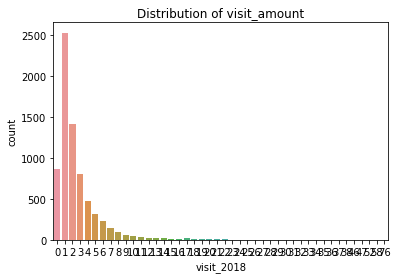

In [47]:
sns.countplot(x='visit_2018', data=df);
plt.title('Distribution of visit_amount');

In [48]:
df.visit_2019.describe()

count    7200.000000
mean        3.952083
std         4.404825
min         0.000000
25%         2.000000
50%         2.000000
75%         5.000000
max       107.000000
Name: visit_2019, dtype: float64

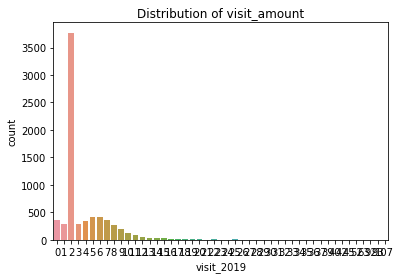

In [49]:
sns.countplot(x='visit_2019', data=df);
plt.title('Distribution of visit_amount');

In [50]:
df.visit_2020.describe()

count    7200.000000
mean        2.983194
std         2.824027
min         0.000000
25%         2.000000
50%         2.000000
75%         4.000000
max        43.000000
Name: visit_2020, dtype: float64

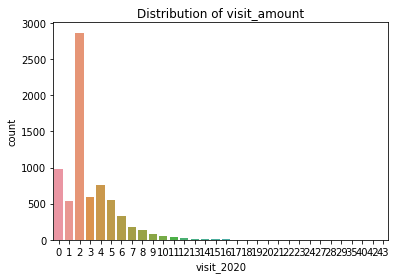

In [51]:
sns.countplot(x='visit_2020', data=df);
plt.title('Distribution of visit_amount');

## add one coloumn，sum三年总量，I want to use avg_visitors over three years

In [52]:
sum_column = df["visit_2018"] + df["visit_2019"] + df["visit_2020"]
df["sum_visits"] = sum_column
df

,hhold_ID,visit_2018,visit_2019,visit_2020,household_pax,avg_ride_count,avg_food_spend,avg_merch_spend,park_home_dist,est_hh_income,sum_visits
0,1,1,3,2,4,19,27,25.148980,145.397020,106667,6
1,2,2,2,1,3,18,15,18.549980,22.009987,83310,5
2,3,3,4,4,6,12,28,33.648800,8.242666,145482,11
3,4,1,3,5,1,22,12,17.734020,19.901816,110248,9
4,5,6,4,6,4,23,25,21.423620,10.544714,89930,16
...,...,...,...,...,...,...,...,...,...,...,...
7195,7196,3,11,8,3,20,13,24.550705,72.720767,137309,22
7196,7197,7,7,7,2,18,15,16.672560,11.717235,75141,21
7197,7198,1,2,2,4,22,28,28.750340,5.198354,129773,5
7198,7199,9,4,4,3,13,13,27.935700,26.845595,138744,17


In [53]:
cte = df.drop(columns=['hhold_ID'])
cte

,visit_2018,visit_2019,visit_2020,household_pax,avg_ride_count,avg_food_spend,avg_merch_spend,park_home_dist,est_hh_income,sum_visits
0,1,3,2,4,19,27,25.148980,145.397020,106667,6
1,2,2,1,3,18,15,18.549980,22.009987,83310,5
2,3,4,4,6,12,28,33.648800,8.242666,145482,11
3,1,3,5,1,22,12,17.734020,19.901816,110248,9
4,6,4,6,4,23,25,21.423620,10.544714,89930,16
...,...,...,...,...,...,...,...,...,...,...
7195,3,11,8,3,20,13,24.550705,72.720767,137309,22
7196,7,7,7,2,18,15,16.672560,11.717235,75141,21
7197,1,2,2,4,22,28,28.750340,5.198354,129773,5
7198,9,4,4,3,13,13,27.935700,26.845595,138744,17


In [54]:
cte.sum_visits.describe()

count    7200.000000
mean        9.635278
std         8.031144
min         0.000000
25%         4.000000
50%         6.000000
75%        14.000000
max       117.000000
Name: sum_visits, dtype: float64

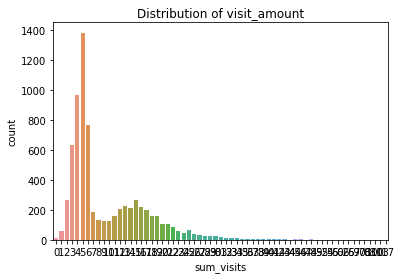

In [55]:
sns.countplot(x='sum_visits', data=cte);
plt.title('Distribution of visit_amount');

This historical chart shows distribution of visitors come to the land  in the past three years.

In [56]:
# spliting training and testing data， ?should we do it here
from sklearn.model_selection import train_test_split

X = cte

X_train, X_test = train_test_split(X,test_size=0.2,random_state=27)

In [57]:
X_train.describe()

,visit_2018,visit_2019,visit_2020,household_pax,avg_ride_count,avg_food_spend,avg_merch_spend,park_home_dist,est_hh_income,sum_visits
count,5760.000000,5760.000000,5760.000000,5760.000000,5760.00000,5760.000000,5760.000000,5760.000000,5760.000000,5760.000000
mean,2.686632,3.934722,3.006250,2.730035,14.86875,17.513368,26.729413,31.134589,112130.514410,9.627604
std,3.586438,4.469989,2.875545,1.073865,4.03016,4.879321,32.591451,24.861559,22647.948923,8.080578
min,0.000000,0.000000,0.000000,1.000000,3.00000,8.000000,0.420480,1.847302,37880.000000,0.000000
25%,1.000000,2.000000,2.000000,2.000000,12.00000,14.000000,21.004145,15.015434,96966.250000,4.000000
50%,2.000000,2.000000,2.000000,3.000000,15.00000,16.000000,24.550705,24.118560,111985.000000,6.000000
75%,3.000000,5.000000,4.000000,3.000000,18.00000,19.000000,28.334775,39.241381,127761.250000,14.000000
max,76.000000,107.000000,43.000000,6.000000,32.00000,36.000000,1419.502520,379.254856,195486.000000,117.000000


In [58]:
from sklearn.preprocessing import StandardScaler

In [59]:
# copy of datasets

X_train_stand = X_train.copy()
X_test_stand = X_test.copy()
X_stand = X.copy()

In [60]:
# numerical features
num_cols = ['visit_2018','visit_2019','visit_2020','household_pax','avg_ride_count','avg_food_spend','avg_merch_spend','park_home_dist','est_hh_income','sum_visits']

In [ ]:
for i in num_cols:
    
    # fit on training data column
    scale = StandardScaler().fit(X_train_stand[[i]])
    
    # transform the training data column
    X_train[i] = scale.transform(X_train[[i]])

    scale = StandardScaler().fit(X_stand[[i]])

    X_stand[i] = scale.transform(X_stand[[i]])

In [63]:
X_stand.describe()

,visit_2018,visit_2019,visit_2020,household_pax,avg_ride_count,avg_food_spend,avg_merch_spend,park_home_dist,est_hh_income,sum_visits
count,7.200000e+03,7.200000e+03,7.200000e+03,7.200000e+03,7.200000e+03,7.200000e+03,7.200000e+03,7.200000e+03,7.200000e+03,7.200000e+03
mean,2.733924e-17,-4.157939e-17,-1.209989e-16,-2.556597e-17,3.503370e-17,-1.396722e-16,2.228541e-17,2.083981e-17,-1.800643e-17,3.773216e-17
std,1.000069e+00,1.000069e+00,1.000069e+00,1.000069e+00,1.000069e+00,1.000069e+00,1.000069e+00,1.000069e+00,1.000069e+00,1.000069e+00
min,-7.428926e-01,-8.972792e-01,-1.056435e+00,-1.611403e+00,-3.200837e+00,-1.948637e+00,-4.483011e-01,-1.168764e+00,-3.293013e+00,-1.199823e+00
25%,-4.677472e-01,-4.432001e-01,-3.481775e-01,-6.836058e-01,-7.124414e-01,-7.222937e-01,-1.016146e-01,-6.462721e-01,-6.687225e-01,-7.017268e-01
50%,-1.926018e-01,-4.432001e-01,-3.481775e-01,2.441909e-01,3.407719e-02,-3.135125e-01,-4.170567e-02,-2.798587e-01,-9.647255e-03,-4.526790e-01
75%,8.254363e-02,2.379185e-01,3.600801e-01,2.441909e-01,7.805958e-01,2.996593e-01,2.149119e-02,3.159576e-01,6.824976e-01,5.435123e-01
max,2.016816e+01,2.339595e+01,1.417110e+01,3.027581e+00,4.264349e+00,3.774300e+00,7.349455e+01,1.391860e+01,3.698235e+00,1.336948e+01


or Normalization ?

In [64]:
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

In [65]:
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(X_stand)

# transform training data
X_norm = norm.transform(X_stand)

# transform testing dataabs
#X_test_norm = norm.transform(X_test)

In [66]:
print(X_norm)

[[0.01315789 0.02803738 0.04651163 ... 0.3803573  0.43644912 0.05128205]
 [0.02631579 0.01869159 0.02325581 ... 0.05342417 0.28825045 0.04273504]
 [0.03947368 0.03738318 0.09302326 ... 0.01694551 0.68272781 0.09401709]
 ...
 [0.01315789 0.01869159 0.04651163 ... 0.00887913 0.58305521 0.04273504]
 [0.11842105 0.03738318 0.09302326 ... 0.06623686 0.63997564 0.14529915]
 [0.         0.02803738 0.04651163 ... 0.06111613 0.47826225 0.04273504]]


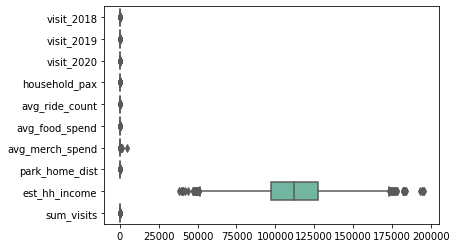

In [67]:
# Original 
sns.boxplot(data=X, orient="h", palette="Set2")


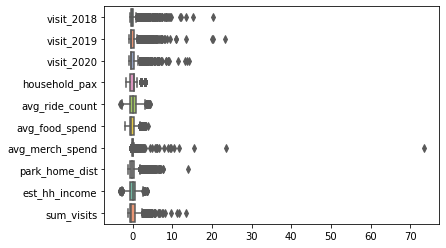

In [68]:
#Standarlization 
sns.boxplot(data=X_stand, orient="h", palette="Set2")

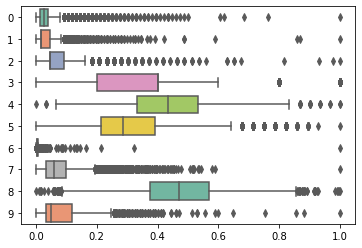

In [69]:
#Normolization 
sns.boxplot(data=X_norm, orient="h", palette="Set2")

In [70]:
from scipy.stats import zscore
zscore = cte.copy().apply(zscore)
zscore.describe().round(3)

,visit_2018,visit_2019,visit_2020,household_pax,avg_ride_count,avg_food_spend,avg_merch_spend,park_home_dist,est_hh_income,sum_visits
count,7200.000,7200.000,7200.000,7200.000,7200.000,7200.000,7200.000,7200.000,7200.000,7200.000
mean,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,0.000,0.000,-0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
min,-0.743,-0.897,-1.056,-1.611,-3.201,-1.949,-0.448,-1.169,-3.293,-1.200
25%,-0.468,-0.443,-0.348,-0.684,-0.712,-0.722,-0.102,-0.646,-0.669,-0.702
50%,-0.193,-0.443,-0.348,0.244,0.034,-0.314,-0.042,-0.280,-0.010,-0.453
75%,0.083,0.238,0.360,0.244,0.781,0.300,0.021,0.316,0.682,0.544
max,20.168,23.396,14.171,3.028,4.264,3.774,73.495,13.919,3.698,13.369


We will standarlize dataset (Zscore)

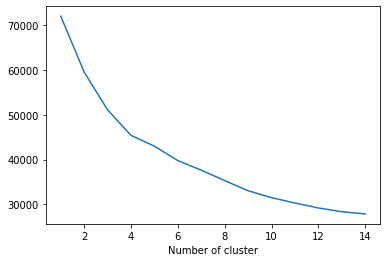

In [71]:
from sklearn.cluster import KMeans

from sklearn.cluster import KMeans

sse={}
tx_recency = X_stand[['visit_2018','visit_2019','visit_2020','household_pax','avg_ride_count','avg_food_spend','avg_merch_spend','park_home_dist','est_hh_income','sum_visits']]
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(tx_recency)
    tx_recency["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ 
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

[72000.0, 59525.72941133975, 50773.538768506216, 45372.56221267983, 42080.5159352162, 39647.287539717014, 36943.18171229152, 34728.13425293191, 32766.777832852997, 31130.252668950638, 29828.538088315952, 28747.05100808922, 27809.84854630076, 27088.0055659877]


Text(0, 0.5, 'Sum of squared distances')

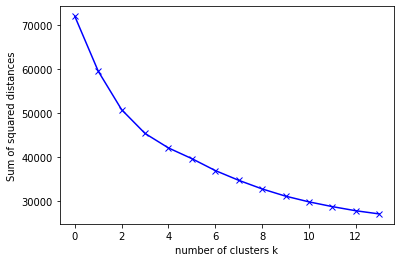

In [72]:
from sklearn.cluster import KMeans
sum_squared_dist = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k, random_state=0)
    km = km.fit(X_stand)
    sum_squared_dist.append(km.inertia_)

print(sum_squared_dist)

import matplotlib.pyplot as plt
plt.plot(sum_squared_dist, 'bx-')
plt.xlabel('number of clusters k')
plt.ylabel('Sum of squared distances')

# method 1 

In [73]:
kmeans = KMeans(n_clusters = 4, random_state = 10000)
kmeans.fit(X_stand)
labels = kmeans.labels_

In [74]:
data = X_stand.assign(Cluster = labels)
data.groupby(['Cluster']).agg({
    'visit_2018':['min','mean','max'],
    'visit_2019':['min','mean','max'],
    'visit_2020':['min','mean','max'],
    'household_pax':['min','mean','max'],
    'avg_ride_count':['min','mean','max'],
    'avg_food_spend':['min','mean','max'],
    'avg_merch_spend':['min','mean','max'],
    'park_home_dist':['min','mean','max'],
    'est_hh_income':['min','mean','max'],
    'sum_visits':['min','mean','max'],
}).round(2)

visit_2018              visit_2019  ... est_hh_income sum_visits             
               min  mean    max        min  ...           max        min  mean    max
Cluster                                     ...                                      
0            -0.74 -0.17   3.11      -0.90  ...          3.15      -1.20 -0.22   1.91
1            -0.74  0.98  20.17      -0.90  ...          3.68       0.29  1.33  13.37
2            -0.74 -0.38   1.18      -0.90  ...          3.70      -1.20 -0.52   0.54
3             0.08  0.08   0.08       0.92  ...         -0.53       0.67  0.67   0.67

[4 rows x 30 columns]

Cluster 0 "Family Pax", they spend a lot on food 
Cluster 1 "Loyalty Visitors", visit the most, high income
Cluster 2 "ramdom visitors" 
Cluster 3 "Out of State Visitors" long distance drive, and high spend on merchandise 

In [76]:
data.round(2).head()

,visit_2018,visit_2019,visit_2020,household_pax,avg_ride_count,avg_food_spend,avg_merch_spend,park_home_dist,est_hh_income,sum_visits,Cluster
0,-0.47,-0.22,-0.35,1.17,1.03,1.93,-0.03,4.57,-0.24,-0.45,0
1,-0.19,-0.44,-0.70,0.24,0.78,-0.52,-0.14,-0.36,-1.28,-0.58,2
2,0.08,0.01,0.36,3.03,-0.71,2.14,0.11,-0.91,1.48,0.17,0
3,-0.47,-0.22,0.71,-1.61,1.78,-1.13,-0.16,-0.45,-0.08,-0.08,2
4,0.91,0.01,1.07,1.17,2.02,1.53,-0.09,-0.82,-0.98,0.79,0


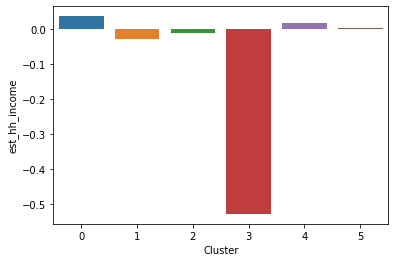

In [34]:
sns.barplot(x = 'Cluster', y = 'est_hh_income', ci = None, data = data);

In [35]:
df = data[(data.Cluster == 0) | (data.Cluster == 1)|(data.Cluster == 2) | (data.Cluster == 3) | (data.Cluster == 4) | (data.Cluster == 5)]

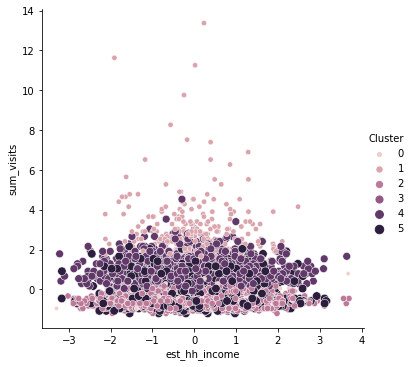

In [36]:
sns.relplot(x = 'est_hh_income', y = 'sum_visits', data = df, hue = 'Cluster', size = 'Cluster');

From the plot we can see no matter which level of income the residents have, they all have enthusiasm in travelling. The most sighnificant info is almost of all the Cluster 1 people stayed over the average level of travelling spend

In [ ]:
)